In [ ]:
#COLLECT THE COMPETITION DATA FROM THE API ENDPOINTS-
https://developer.sportradar.com/tennis/reference/competitions

#API_Key = uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y

#Get - https://api.sportradar.com/tennis/{access_level}/{version_number}/{language_code}/competitions.{format}
#access_level   = trial
#version_number = v3
#language_code  = en
#Status_Code    = 200

In [119]:
import requests

url = "https://api.sportradar.com/tennis/trial/v3/en/competitions/sr%3Acompetition%3A3101/info.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
headers = {"accept": "application/json"}

response = requests.get(url, headers=headers)

print(response.text)

{"generated_at":"2025-04-18T06:04:33+00:00","competition":{"id":"sr:competition:3101","name":"ATP Vienna, Austria","children":[{"competition":{"id":"sr:competition:3103","name":"ATP Vienna, Austria Men Singles","parent_id":"sr:competition:3101","type":"singles","gender":"men","level":"atp_500"}},{"competition":{"id":"sr:competition:3105","name":"ATP Vienna, Austria Men Doubles","parent_id":"sr:competition:3101","type":"doubles","gender":"men","level":"atp_500"}}],"type":"singles","category":{"id":"sr:category:3","name":"ATP"},"alternative_name":"Erste Bank Open"}}


In [15]:
#Just for the format and details [In Order]
{
  "generated_at": "2025-04-08T11:27:18+00:00",
  "competition": {
    "id": "sr:competition:3101",
    "name": "ATP Vienna, Austria",
    "children": [
      {
        "competition": {
          "id": "sr:competition:3103",
          "name": "ATP Vienna, Austria Men Singles",
          "parent_id": "sr:competition:3101",
          "type": "singles",
          "gender": "men",
          "level": "atp_500"
        }
      },
      {
        "competition": {
          "id": "sr:competition:3105",
          "name": "ATP Vienna, Austria Men Doubles",
          "parent_id": "sr:competition:3101",
          "type": "doubles",
          "gender": "men",
          "level": "atp_500"
        }
      }
    ],
    "type": "singles",
    "category": {
      "id": "sr:category:3",
      "name": "ATP"
    },
    "alternative_name": "Erste Bank Open"
  }
}

{'generated_at': '2025-04-08T11:27:18+00:00',
 'competition': {'id': 'sr:competition:3101',
  'name': 'ATP Vienna, Austria',
  'children': [{'competition': {'id': 'sr:competition:3103',
     'name': 'ATP Vienna, Austria Men Singles',
     'parent_id': 'sr:competition:3101',
     'type': 'singles',
     'gender': 'men',
     'level': 'atp_500'}},
   {'competition': {'id': 'sr:competition:3105',
     'name': 'ATP Vienna, Austria Men Doubles',
     'parent_id': 'sr:competition:3101',
     'type': 'doubles',
     'gender': 'men',
     'level': 'atp_500'}}],
  'type': 'singles',
  'category': {'id': 'sr:category:3', 'name': 'ATP'},
  'alternative_name': 'Erste Bank Open'}}

In [120]:
import requests
import json

#API endpoint and headers
api_key =  "uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
url = "https://api.sportradar.com/tennis/trial/v3/en/competitions/sr%3Acompetition%3A3101/info.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
headers = {"accept": "application/json"}

#Fetch the data from the API
response = requests.get(url, headers = headers)
#competition_id = 3101

#Steps:
#Step: 1 --> Convert the JSON text to a Python Dictionary
data = json.loads(response.text)

# Step 2: Extract competition name
# Since it's a single competition, we can access fields directly
competition_name = data.get("name")
competition_id = data.get("id")
competition_gender = data.get("gender")


In [121]:
data["competition"]

{'id': 'sr:competition:3101',
 'name': 'ATP Vienna, Austria',
 'children': [{'competition': {'id': 'sr:competition:3103',
    'name': 'ATP Vienna, Austria Men Singles',
    'parent_id': 'sr:competition:3101',
    'type': 'singles',
    'gender': 'men',
    'level': 'atp_500'}},
  {'competition': {'id': 'sr:competition:3105',
    'name': 'ATP Vienna, Austria Men Doubles',
    'parent_id': 'sr:competition:3101',
    'type': 'doubles',
    'gender': 'men',
    'level': 'atp_500'}}],
 'type': 'singles',
 'category': {'id': 'sr:category:3', 'name': 'ATP'},
 'alternative_name': 'Erste Bank Open'}

In [122]:
df = []  #Initialize an empty list to store dictionaries

#Loop through the 'competitions' key from 'data', which is expected to be a list of competition data
for competition in data.get("competitions", []):
    df.append({                                        #Append a dictionary to the 'df' list
        "category_id": competition["category"]["id"],  #Extracts 'id' from 'category' of the competition
        "category_name": competition["category"]["name"],  #Extracts 'name' from 'category' of the competition
        "competition_id": competition["id"],               #Extracts 'id' of the competition
        "competition_name": competition["name"],           #Extracts 'name' of the competition
        "type": competition.get("type"),             #Optionally extracts 'type' of competition, returns None if not present
        "gender": competition.get("gender"),        #Optionally extracts 'gender' of competition, returns None if not present
        "parent_id": competition.get("parent_id", None),  #Optionally extracts 'parent_id', returns None if not present
    })


In [123]:
import pandas as pd
pf=pd.DataFrame(df)
pf

""


In [124]:
pip install mysql-connector-python pandas

In [126]:
import mysql.connector

#Replace the values below with the actual DB credentials
try:
    conn = mysql.connector.connect(
        host="localhost",
        user="root",                 
        password="",                  
        database="sportanalytics",
        port = 3314
    )

    if conn.is_connected():
        print("Connection successful!")

        #Create a cursor for SQL operations
        cursor = conn.cursor()

        #Optional: test a simple SQL command
        cursor.execute("SHOW TABLES;")
        for table in cursor:
            print(table)

        #Close connection
        cursor.close()
        conn.close()

except mysql.connector.Error as err:
    print("Connection failed:", err)

Connection successful!
('categorytable',)
('competitions',)
('competitiontable',)
('competitor_ranking_table',)
('competitors_table',)
('competitors_table_backup',)
('complex',)
('venue',)


In [128]:
#Establish the database connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="sportanalytics",
    port = 3314
)
cursor = conn.cursor()

#Create the tables
cursor.execute("""
CREATE TABLE IF NOT EXISTS categorytable (
    category_id VARCHAR(50) PRIMARY KEY,
    category_name VARCHAR(100) NOT NULL
);
""")

#Create Competitions table
cursor.execute("""
CREATE TABLE IF NOT EXISTS competitiontable (
    competition_id VARCHAR(50) PRIMARY KEY,
    competition_name VARCHAR(100) NOT NULL,
    parent_id VARCHAR(50),
    type VARCHAR(20) NOT NULL,
    gender VARCHAR(10) NOT NULL,
    category_id VARCHAR(50),
    FOREIGN KEY (category_id) REFERENCES categorytable(category_id)
);
""")

#Fetch data from Sportradar API
def fetch_competitions():
    api_key = "uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
    url = "https://api.sportradar.com/tennis/trial/v3/en/competitions.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
    print(f"Fetching data from: {url}")
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error {response.status_code}: {response.text}")
        return None
    

#Step 4: Parse API response
data = fetch_competitions()
rows = []
if data and "competitions" in data:
    for item in data["competitions"]:
        category = item.get("category", {})
        rows.append({
            "category_id": category.get("id", "unknown"),
            "category_name": category.get("name", "unknown"),
            "competition_id": item.get("id", "unknown"),
            "competition_name": item.get("name", "unknown"),
            "parent_id": item.get("parent_id"),
            "type": item.get("type", "unknown"),
            "gender": item.get("gender", "unknown")
        })

#Step 5: Convert to DataFrame
df = pd.DataFrame(rows)
print("Columns in df:", df.columns.tolist())
print(df.head(3))  # preview a few rows

# Database connection
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="sportanalytics",
    port=3314
)
cursor = conn.cursor()

# Insert into categorytable
unique_categories = df[['category_id', 'category_name']].drop_duplicates()
for _, row in unique_categories.iterrows():
    cursor.execute("""
        INSERT IGNORE INTO categorytable (category_id, category_name)
        VALUES (%s, %s)
    """, (row['category_id'], row['category_name']))

# Insert into competitiontable
for _, row in df.iterrows():
    cursor.execute("""
        INSERT IGNORE INTO competitiontable (
            competition_id, competition_name, parent_id, type, gender, category_id
        ) VALUES (%s, %s, %s, %s, %s, %s)
    """, (
        row['competition_id'],
        row['competition_name'],
        row['parent_id'],
        row['type'],
        row['gender'],
        row['category_id']
    ))

conn.commit()
cursor.close()
conn.close()
print("Data inserted successfully!")

Fetching data from: https://api.sportradar.com/tennis/trial/v3/en/competitions.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y
Columns in df: ['category_id', 'category_name', 'competition_id', 'competition_name', 'parent_id', 'type', 'gender']
       category_id category_name      competition_id  \
0  sr:category:181    Hopman Cup  sr:competition:620   
1    sr:category:3           ATP  sr:competition:660   
2   sr:category:72    Challenger  sr:competition:990   

             competition_name            parent_id     type gender  
0                  Hopman Cup                 None    mixed  mixed  
1              World Team Cup                 None    mixed    men  
2  ATP Challenger Tour Finals  sr:competition:6239  singles    men  
Data inserted successfully!


In [129]:
#Create categories_df

categories_df = df[['category_id', 'category_name']].drop_duplicates()
print("Categories DataFrame:")
print(categories_df.head(5000))

Categories DataFrame:
           category_id         category_name
0      sr:category:181            Hopman Cup
1        sr:category:3                   ATP
2       sr:category:72            Challenger
3        sr:category:6                   WTA
4       sr:category:76             Davis Cup
5       sr:category:74  Billie Jean King Cup
358    sr:category:785               ITF Men
376    sr:category:213             ITF Women
679    sr:category:871              WTA 125K
922   sr:category:1012                  IPTL
923     sr:category:79            Exhibition
1341  sr:category:1474               Juniors
1345  sr:category:1476           Wheelchairs
1349  sr:category:1475               Legends
4844  sr:category:2400   Wheelchairs Juniors
5005  sr:category:2414            United Cup
5793  sr:category:2517             UTR Women
5796  sr:category:2516               UTR Men


In [130]:
#Create categories_df with duplicates (Optional)
categories_df = df[['category_id', 'category_name']]
print("Categories DataFrame (with duplicates):")
print(categories_df.head(5000))

Categories DataFrame (with duplicates):
          category_id category_name
0     sr:category:181    Hopman Cup
1       sr:category:3           ATP
2      sr:category:72    Challenger
3       sr:category:6           WTA
4      sr:category:76     Davis Cup
...               ...           ...
4995  sr:category:213     ITF Women
4996  sr:category:213     ITF Women
4997  sr:category:213     ITF Women
4998  sr:category:213     ITF Women
4999  sr:category:785       ITF Men

[5000 rows x 2 columns]


In [131]:
categories_df

,category_id,category_name
0,sr:category:181,Hopman Cup
1,sr:category:3,ATP
2,sr:category:72,Challenger
3,sr:category:6,WTA
4,sr:category:76,Davis Cup
...,...,...
5995,sr:category:2516,UTR Men
5996,sr:category:2516,UTR Men
5997,sr:category:2516,UTR Men
5998,sr:category:2517,UTR Women


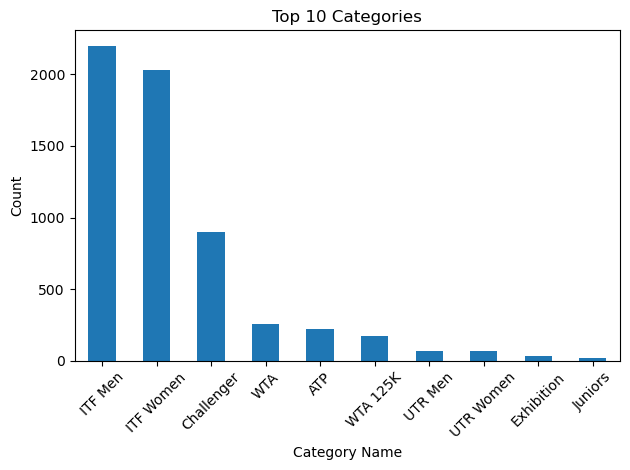

In [132]:
#Step 2:(Optional): Explore Categories with a Bar Plot

import matplotlib.pyplot as plt

categories_df['category_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Categories')
plt.xlabel('Category Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

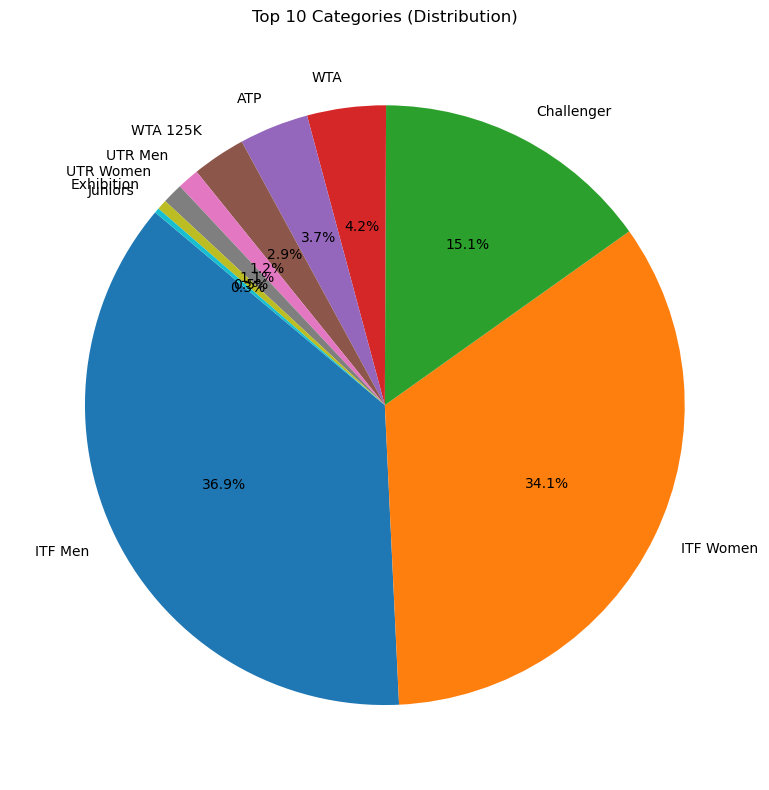

In [133]:
#(Optional): Explore Categories with a Pie Plot
import matplotlib.pyplot as plt

# Get top 10 categories
top_categories = categories_df['category_name'].value_counts().head(10)

# Plot pie chart
top_categories.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('Top 10 Categories (Distribution)')
plt.ylabel('')  # Hide y-label for cleaner look
plt.tight_layout()
plt.show()


In [134]:
#Step: 1 Create competitions_df with duplicates
competitions_df = df[['competition_id', 'competition_name', 'parent_id', 'type', 'gender', 'category_id']]
print("Competitions DataFrame (with duplicates):")
print(competitions_df.head(5000))


Competitions DataFrame (with duplicates):
            competition_id                      competition_name  \
0       sr:competition:620                            Hopman Cup   
1       sr:competition:660                        World Team Cup   
2       sr:competition:990            ATP Challenger Tour Finals   
3      sr:competition:1207     Championship International Series   
4      sr:competition:2100                             Davis Cup   
...                    ...                                   ...   
4995  sr:competition:38277  ITF Great Britain 17A, Women Singles   
4996  sr:competition:38279  ITF Great Britain 17A, Women Doubles   
4997  sr:competition:38283      ITF Australia 16A, Women Singles   
4998  sr:competition:38285      ITF Australia 16A, Women Doubles   
4999  sr:competition:38317              ITF USA F45, Men Singles   

                 parent_id     type gender      category_id  
0                     None    mixed  mixed  sr:category:181  
1                

In [135]:
#Optional: Create competitions_df without duplicates
competitions_df_unique = df[['competition_id', 'competition_name', 'parent_id', 'type', 'gender', 'category_id']].drop_duplicates()
print("Competitions DataFrame (without duplicates):")
print(competitions_df_unique.head(5000))

Competitions DataFrame (without duplicates):
            competition_id                      competition_name  \
0       sr:competition:620                            Hopman Cup   
1       sr:competition:660                        World Team Cup   
2       sr:competition:990            ATP Challenger Tour Finals   
3      sr:competition:1207     Championship International Series   
4      sr:competition:2100                             Davis Cup   
...                    ...                                   ...   
4995  sr:competition:38277  ITF Great Britain 17A, Women Singles   
4996  sr:competition:38279  ITF Great Britain 17A, Women Doubles   
4997  sr:competition:38283      ITF Australia 16A, Women Singles   
4998  sr:competition:38285      ITF Australia 16A, Women Doubles   
4999  sr:competition:38317              ITF USA F45, Men Singles   

                 parent_id     type gender      category_id  
0                     None    mixed  mixed  sr:category:181  
1             

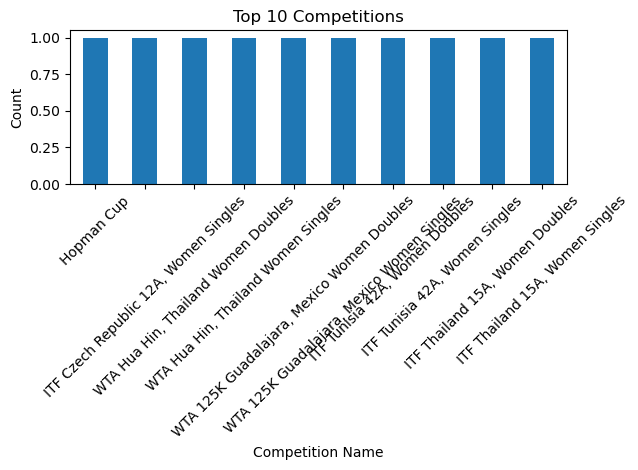

In [136]:

#(Optional): Explore Competitions with a Bar Plot

import matplotlib.pyplot as plt

#Plot the top 10 most frequent competition names
competitions_df['competition_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Competitions')
plt.xlabel('Competition Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

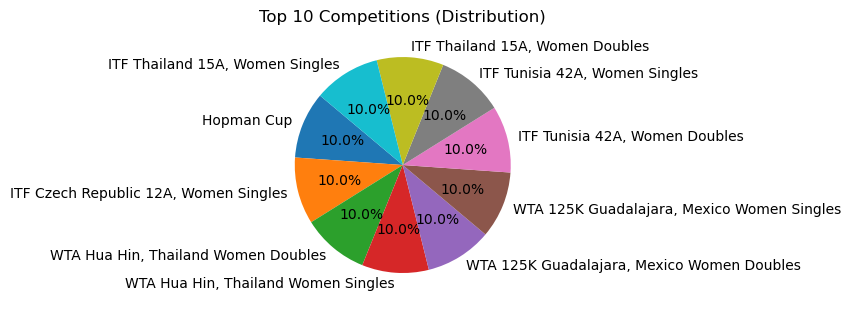

In [137]:

#(Optional): Explore Competitions with a Pie Plot
import matplotlib.pyplot as plt

# Get top 10 competitions
top_competitions = competitions_df['competition_name'].value_counts().head(10)

# Plot pie chart
top_competitions.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('Top 10 Competitions (Distribution)')
plt.ylabel('')  # Hides y-label for better display
plt.tight_layout()
plt.show()

In [138]:
import mysql.connector
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="",
    database="sportanalytics",
    port = 3314
)
cursor = conn.cursor()

In [139]:
from tabulate import tabulate

In [140]:
#Data Analysis
#Executing the following SQL queries
#1.List all competitions along with their category name
 
cursor.execute('''
    SELECT b.competition_name, a.category_name 
    FROM categorytable a 
    JOIN competitiontable b 
    ON a.category_id = b.category_id
''')

results = cursor.fetchall()
headers = ["Competition Name", "Category Name"]
table = tabulate(results, headers, tablefmt="grid")
print(table)


+--------------------------------------------------------------------+----------------------+
| Competition Name                                                   | Category Name        |
+====================================================================+======================+
| IPTL                                                               | IPTL                 |
+--------------------------------------------------------------------+----------------------+
| Juniors AO, Melbourne, Australia Men Singles                       | Juniors              |
+--------------------------------------------------------------------+----------------------+
| Juniors AO, Melbourne, Australia Men Doubles                       | Juniors              |
+--------------------------------------------------------------------+----------------------+
| Juniors AO, Melbourne, Australia Women Singles                     | Juniors              |
+-----------------------------------------------------------

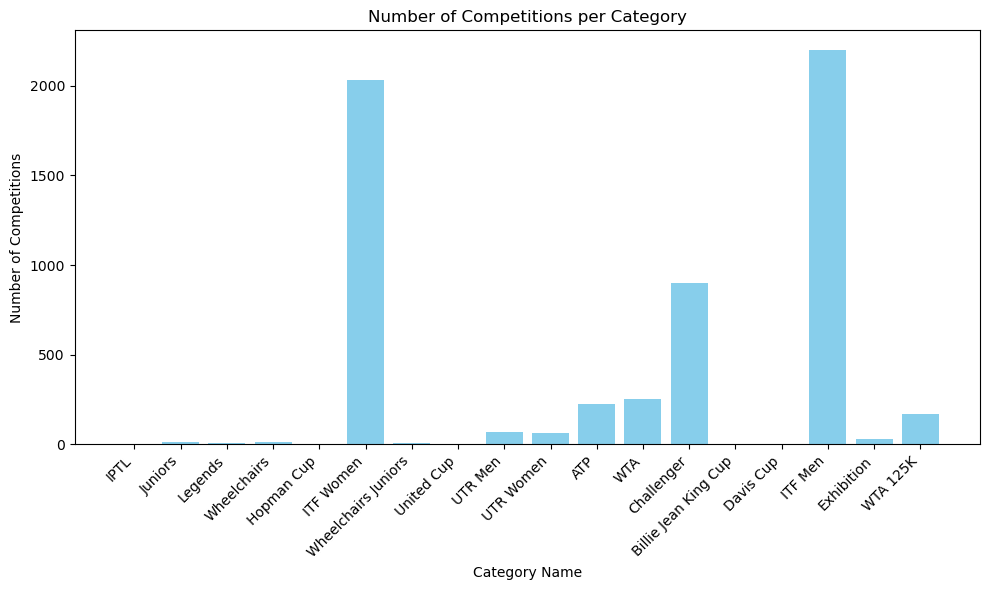

In [141]:
#Optional: 1)List all competitions along with their category name
import matplotlib.pyplot as plt

#Assuming 'results' is already fetched from the SQL query
competitions = [row[0] for row in results]  # List of competition names
categories = [row[1] for row in results]  # List of category names

#Count the occurrences of each category
category_counts = {}
for category in categories:
    category_counts[category] = category_counts.get(category, 0) + 1

#Plotting the bar chart
category_labels = list(category_counts.keys())
category_values = list(category_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(category_labels, category_values, color='skyblue')

plt.xlabel('Category Name')
plt.ylabel('Number of Competitions')
plt.title('Number of Competitions per Category')

#Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

#Show the plot
plt.tight_layout()
plt.show()


In [142]:
#2.Count the number of competitions in each category

cursor.execute(
    '''SELECT cat.category_name, COUNT(c.competition_id) AS num_competitions
FROM competitiontable c
JOIN categorytable cat ON c.category_id = cat.category_id
GROUP BY cat.category_name limit 100;
    '''             
)
results = cursor.fetchall()
headers = ["category_name", "num_competitions"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+----------------------+--------------------+
| category_name        |   num_competitions |
+======================+====================+
| ATP                  |                223 |
+----------------------+--------------------+
| Billie Jean King Cup |                  1 |
+----------------------+--------------------+
| Challenger           |                900 |
+----------------------+--------------------+
| Davis Cup            |                  1 |
+----------------------+--------------------+
| Exhibition           |                 32 |
+----------------------+--------------------+
| Hopman Cup           |                  1 |
+----------------------+--------------------+
| IPTL                 |                  1 |
+----------------------+--------------------+
| ITF Men              |               2198 |
+----------------------+--------------------+
| ITF Women            |               2032 |
+----------------------+--------------------+
| Juniors              |          

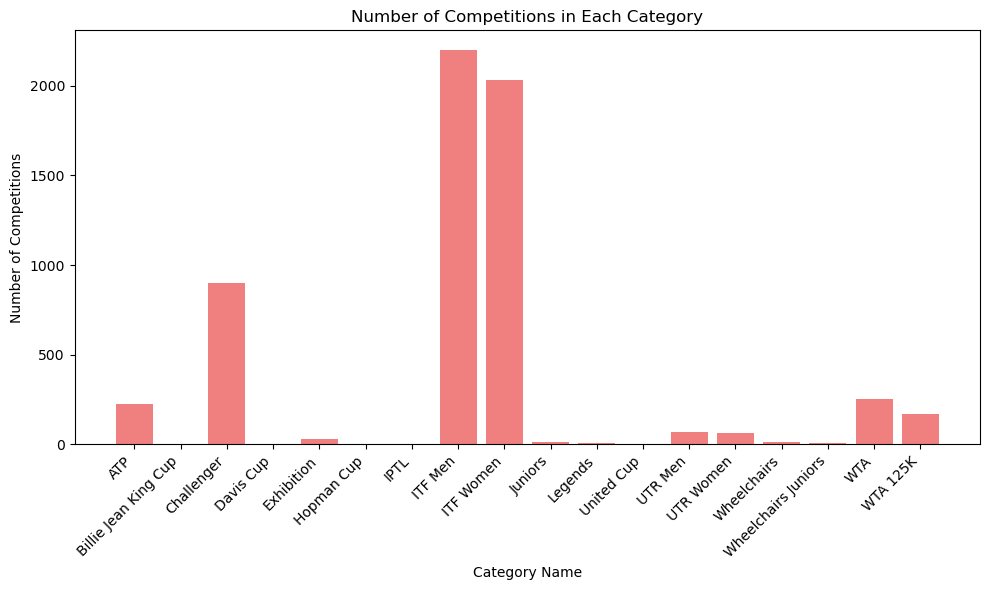

In [143]:
#Optional: 2)Count the number of competitions in each category

#Assuming 'results' is already fetched from the SQL query
categories = [row[0] for row in results]  # List of category names
num_competitions = [row[1] for row in results]  # List of number of competitions

#Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, num_competitions, color='lightcoral')

plt.xlabel('Category Name')
plt.ylabel('Number of Competitions')
plt.title('Number of Competitions in Each Category')

#Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

#Show the plot
plt.tight_layout()
plt.show()


In [144]:
#3.Find all competitions of type 'doubles'
cursor.execute(
    '''SELECT c.competition_name, cat.category_name
FROM competitiontable c
JOIN categorytable cat ON c.category_id = cat.category_id
WHERE c.type = 'doubles' limit 100;
    '''             
)
results = cursor.fetchall()
headers = ["category_name", "num_competitions"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+------------------------------------------------------------+--------------------+
| category_name                                              | num_competitions   |
+============================================================+====================+
| Juniors AO, Melbourne, Australia Men Doubles               | Juniors            |
+------------------------------------------------------------+--------------------+
| Juniors AO, Melbourne, Australia Women Doubles             | Juniors            |
+------------------------------------------------------------+--------------------+
| Juniors French Open, Paris, France Men Doubles             | Juniors            |
+------------------------------------------------------------+--------------------+
| Juniors French Open, Paris, France Women Doubles           | Juniors            |
+------------------------------------------------------------+--------------------+
| Juniors Wimbledon, London, GB Men Doubles                  | Juniors      

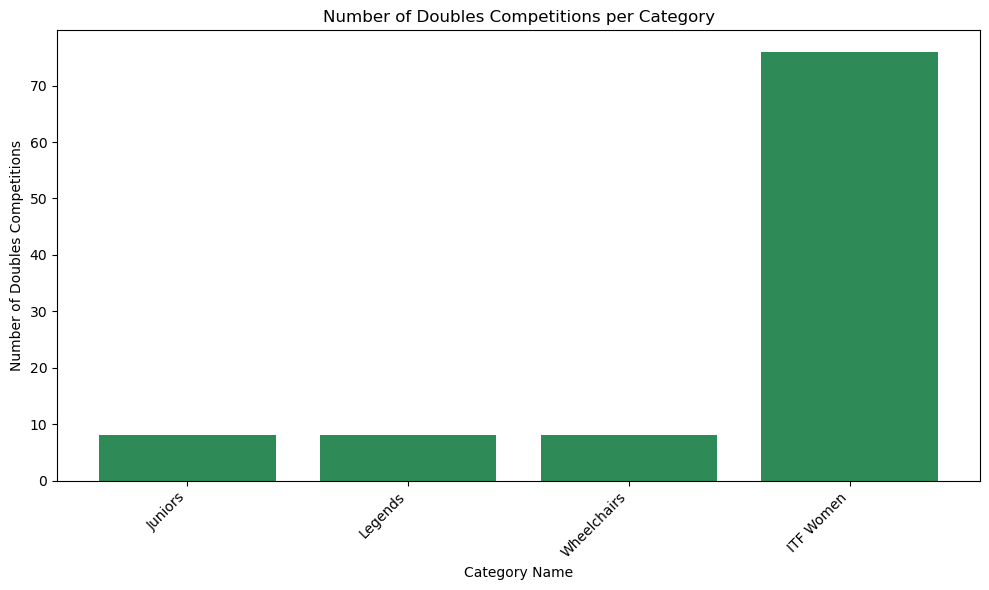

In [145]:
#Optional: 3)Find all competitions of type 'doubles'

#Assuming 'results' is already fetched from the SQL query
categories = [row[1] for row in results]  # List of category names
competitions = [row[0] for row in results]  # List of competition names

#Count the number of doubles competitions per category
category_counts = {}
for category in categories:
    category_counts[category] = category_counts.get(category, 0) + 1

#Plotting the bar chart
category_labels = list(category_counts.keys())
category_values = list(category_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(category_labels, category_values, color='seagreen')

plt.xlabel('Category Name')
plt.ylabel('Number of Doubles Competitions')
plt.title('Number of Doubles Competitions per Category')

#Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

#Show the plot
plt.tight_layout()
plt.show()


In [146]:
#4.Get competitions that belong to a specific category (e.g., ITF Men)
cursor.execute(
    '''SELECT c.competition_name, cat.category_name
FROM competitiontable c
JOIN categorytable cat ON c.category_id = cat.category_id
WHERE cat.category_name = 'ITF Men' limit 100;
    '''             
)
results = cursor.fetchall()
headers = ["category_name", "num_competitions"]
table = tabulate(results, headers, tablefmt="grid")
print(table)


+--------------------------------------------------------------------+--------------------+
| category_name                                                      | num_competitions   |
+====================================================================+====================+
| ITF Men Stara Zagora, Bulgaria Men Singles                         | ITF Men            |
+--------------------------------------------------------------------+--------------------+
| ITF Men Stara Zagora, Bulgaria Men Doubles                         | ITF Men            |
+--------------------------------------------------------------------+--------------------+
| ITF Men Sibiu, Romania Men Singles                                 | ITF Men            |
+--------------------------------------------------------------------+--------------------+
| ITF Men Sibiu, Romania Men Doubles                                 | ITF Men            |
+--------------------------------------------------------------------+----------

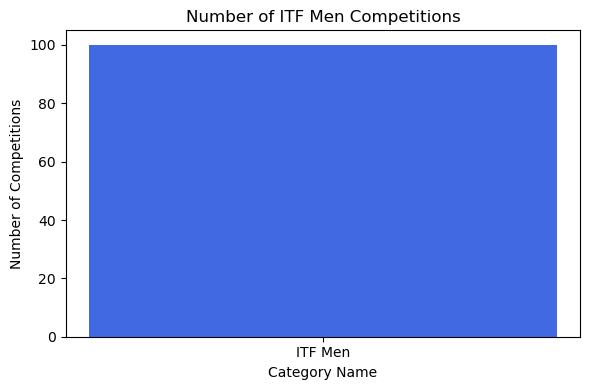

In [147]:
#Optional: 4) Get competitions that belong to a specific category (e.g., ITF Men)

#Assuming 'results' is already fetched from the SQL query
competitions = [row[0] for row in results]  # List of competition names

#Since all competitions belong to the 'ITF Men' category, the y-axis will simply be the number of competitions
num_competitions = len(competitions)

#Plotting the bar chart
plt.figure(figsize=(6, 4))
plt.bar(['ITF Men'], [num_competitions], color='royalblue')

plt.xlabel('Category Name')
plt.ylabel('Number of Competitions')
plt.title('Number of ITF Men Competitions')

#Show the plot
plt.tight_layout()
plt.show()

In [148]:
#5.Identify parent competitions and their sub-competitions
cursor.execute(
    '''   SELECT a.competition_name,a.parent_id,a.competition_id,b.competition_name
    FROM competitiontable a JOIN competitiontable b ON a.parent_id = b.competition_id
    '''             
)
results = cursor.fetchall()
headers = ["parent_competition", "sub_competition","parent_comp_id","sub_com_id"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+-----------------------------+----------------------+----------------------+-----------------------------+
| parent_competition          | sub_competition      | parent_comp_id       | sub_com_id                  |
+=============================+======================+======================+=============================+
| ITF Romania F9, Men Doubles | sr:competition:16976 | sr:competition:16978 | ITF Romania F9, Men Singles |
+-----------------------------+----------------------+----------------------+-----------------------------+
| UTR Boca Raton W03          | sr:competition:45363 | sr:competition:45971 | UTR Boca Raton W01          |
+-----------------------------+----------------------+----------------------+-----------------------------+


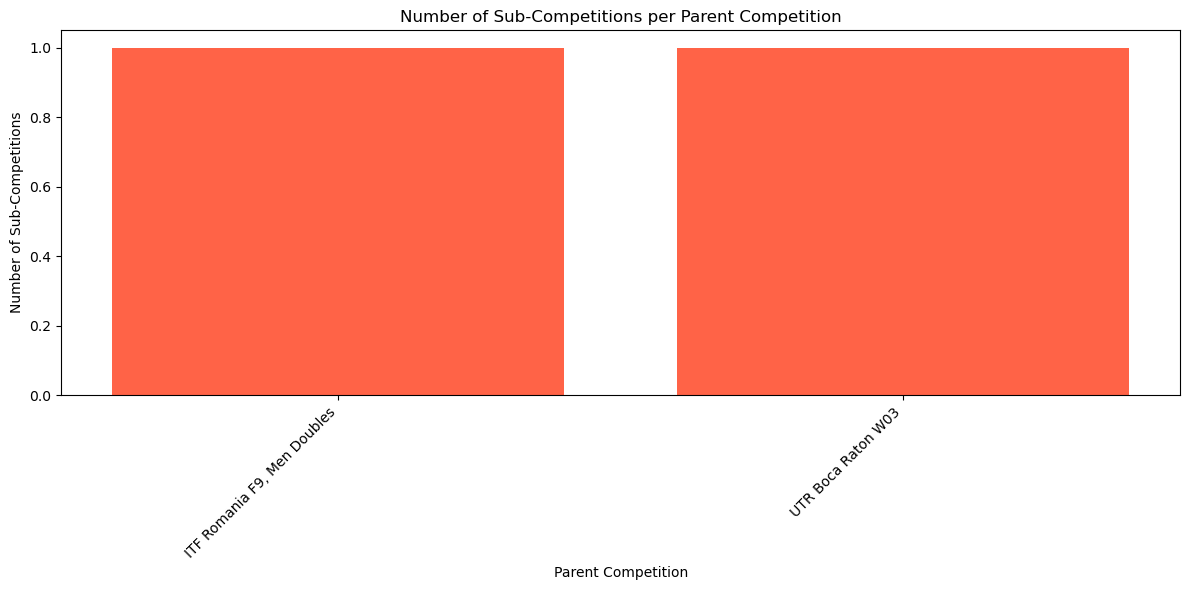

In [149]:
#Optional: 5)Identify parent competitions and their sub-competitions

#"Results" is already fetched from the SQL query
parent_competitions = [row[0] for row in results]  # List of parent competition names
sub_competitions = [row[1] for row in results]  # List of sub-competition names

#Count the number of sub-competitions per parent competition
parent_counts = {}
for parent in parent_competitions:
    parent_counts[parent] = parent_counts.get(parent, 0) + 1

#Plotting the bar chart
parent_labels = list(parent_counts.keys())
parent_values = list(parent_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(parent_labels, parent_values, color='tomato')

plt.xlabel('Parent Competition')
plt.ylabel('Number of Sub-Competitions')
plt.title('Number of Sub-Competitions per Parent Competition')

#Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

#Show the plot
plt.tight_layout()
plt.show()

In [150]:
#6.Analyze the distribution of competition types by category
cursor.execute(
    '''SELECT cat.category_name, c.type, COUNT(c.competition_id) AS count
FROM competitiontable c
JOIN categorytable cat ON c.category_id = cat.category_id
GROUP BY cat.category_name, c.type
ORDER BY cat.category_name, c.type limit 100;

    '''             
)
results = cursor.fetchall()
headers = ["category_name", "num_competitions"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+----------------------+-----------------+--------------------+
|                      | category_name   |   num_competitions |
+======================+=================+====================+
| ATP                  | doubles         |                107 |
+----------------------+-----------------+--------------------+
| ATP                  | mixed           |                  2 |
+----------------------+-----------------+--------------------+
| ATP                  | mixed_doubles   |                  6 |
+----------------------+-----------------+--------------------+
| ATP                  | singles         |                108 |
+----------------------+-----------------+--------------------+
| Billie Jean King Cup | mixed           |                  1 |
+----------------------+-----------------+--------------------+
| Challenger           | doubles         |                449 |
+----------------------+-----------------+--------------------+
| Challenger           | singles        

In [151]:
print("Sample rows from results:")
for row in results[:25]:
    print(row)

Sample rows from results:
('ATP', 'doubles', 107)
('ATP', 'mixed', 2)
('ATP', 'mixed_doubles', 6)
('ATP', 'singles', 108)
('Billie Jean King Cup', 'mixed', 1)
('Challenger', 'doubles', 449)
('Challenger', 'singles', 451)
('Davis Cup', 'mixed', 1)
('Exhibition', 'doubles', 8)
('Exhibition', 'mixed_doubles', 2)
('Exhibition', 'singles', 22)
('Hopman Cup', 'mixed', 1)
('IPTL', 'singles', 1)
('ITF Men', 'doubles', 1099)
('ITF Men', 'singles', 1099)
('ITF Women', 'doubles', 1018)
('ITF Women', 'singles', 1014)
('Juniors', 'doubles', 8)
('Juniors', 'singles', 8)
('Legends', 'doubles', 8)
('Legends', 'mixed_doubles', 3)
('United Cup', 'mixed', 1)
('UTR Men', 'singles', 70)
('UTR Women', 'singles', 66)
('Wheelchairs', 'doubles', 8)


In [152]:
#SQL query:
#SELECT cat.category_name, c.type, COUNT(c.competition_id) AS count
#FROM competitiontable c
#JOIN categorytable cat ON c.category_id = cat.category_id
#GROUP BY cat.category_name, c.type
#ORDER BY cat.category_name, c.type
#LIMIT 100;

cursor.execute("""
    SELECT cat.category_name, c.type, COUNT(c.competition_id) AS count
    FROM competitiontable c
    JOIN categorytable cat ON c.category_id = cat.category_id
    GROUP BY cat.category_name, c.type
    ORDER BY cat.category_name, c.type
    LIMIT 100;
""")

results = cursor.fetchall()


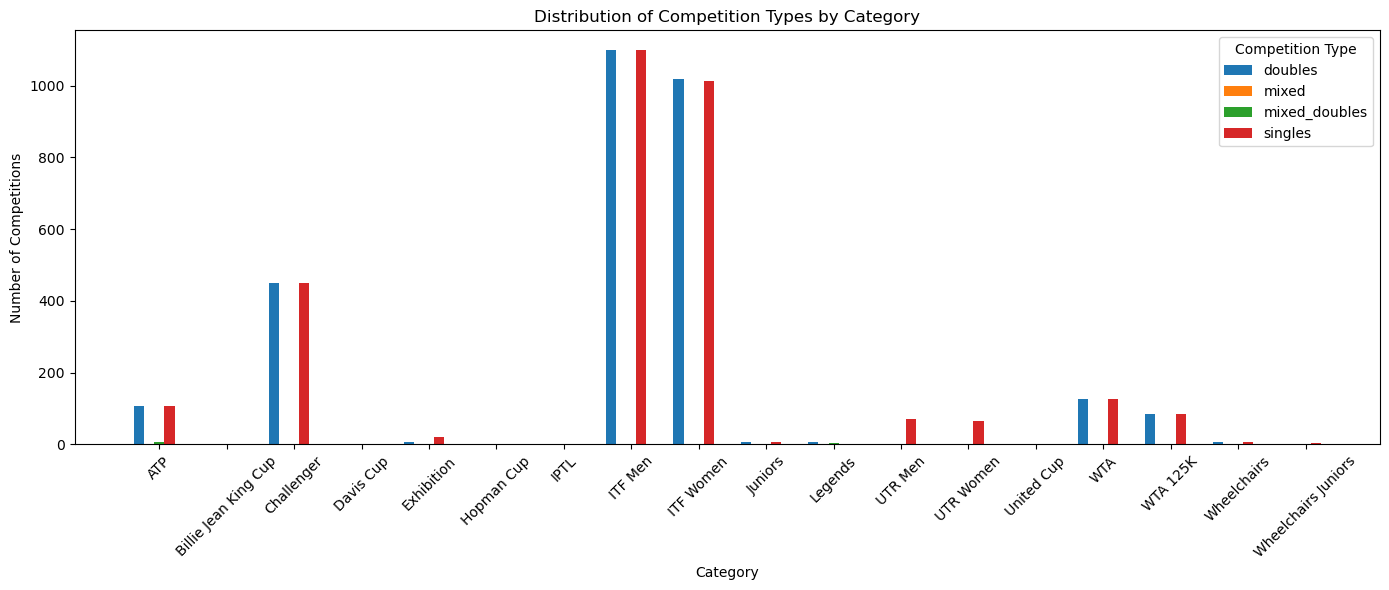

In [153]:
#Optional: 6)Analyze the distribution of competition types by category

import numpy as np

# Filter out any rows that don't have exactly 3 elements
valid_results = [row for row in results if len(row) == 3]

# If no valid data is found, skip plotting
if not valid_results:
    print("No valid data available to plot.")
else:
    # Extract values
    categories = [row[0] for row in valid_results]
    types = [row[1] for row in valid_results]
    counts = [row[2] for row in valid_results]

    # Unique sorted categories and types
    unique_categories = sorted(set(categories))
    unique_types = sorted(set(types))

    # Initialize dictionary to hold counts
    category_type_count = {
        cat: {typ: 1 for typ in unique_types} for cat in unique_categories
    }

    # Fill dictionary with actual values
    for cat, typ, cnt in valid_results:
        category_type_count[cat][typ] = cnt

    # Plotting setup
    bar_width = 0.15
    x = np.arange(len(unique_categories))  # X positions

    plt.figure(figsize=(14, 6))

    # Plot bars for each type
    for i, typ in enumerate(unique_types):
        values = [category_type_count[cat][typ] for cat in unique_categories]
        plt.bar(x + i * bar_width, values, width=bar_width, label=typ)

    # Axis & layout
    plt.xlabel('Category')
    plt.ylabel('Number of Competitions')
    plt.title('Distribution of Competition Types by Category')
    plt.xticks(x + bar_width * len(unique_types) / 2, unique_categories, rotation=45)
    plt.legend(title='Competition Type')
    plt.tight_layout()
    plt.show()

# Categories and Types: Extract unique categories and competition types from the results.
# Data Preparation: Store competition type counts for each category in a dictionary.
# Plotting: Create a grouped bar chart showing competition types by category.


In [154]:
#7.List all competitions with no parent (top-level competitions)
cursor.execute(
    '''SELECT c.competition_name, cat.category_name
FROM competitiontable c
JOIN categorytable cat ON c.category_id = cat.category_id
WHERE c.parent_id IS NULL limit 100;
    '''             
)
results = cursor.fetchall()
headers = ["category_name", "num_competitions"]
table = tabulate(results, headers, tablefmt="grid")
print(table)

+---------------------------------------------+--------------------+
| category_name                               | num_competitions   |
+=============================================+====================+
| IPTL                                        | IPTL               |
+---------------------------------------------+--------------------+
| Hopman Cup                                  | Hopman Cup         |
+---------------------------------------------+--------------------+
| ITF Colombia 02A, Women Singles             | ITF Women          |
+---------------------------------------------+--------------------+
| ITF Australia 02B, Women Doubles            | ITF Women          |
+---------------------------------------------+--------------------+
| ITF Uzbekistan 01A, Women Singles           | ITF Women          |
+---------------------------------------------+--------------------+
| ITF Tunisia 39A, Women Doubles              | ITF Women          |
+---------------------------------

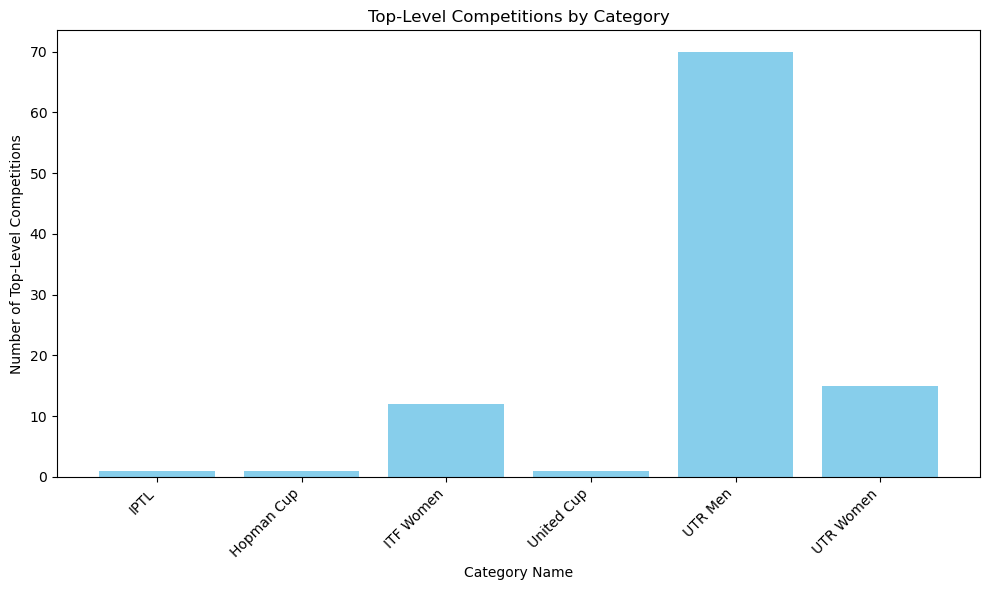

In [155]:
#Optional - 7)List all competitions with no parent (top-level competitions)
from collections import Counter

# Fetch data
cursor.execute('''
    SELECT c.competition_name, cat.category_name
    FROM competitiontable c
    JOIN categorytable cat ON c.category_id = cat.category_id
    WHERE c.parent_id IS NULL
    LIMIT 100;
''')
results = cursor.fetchall()

# Count number of top-level competitions per category
category_counts = Counter([row[1] for row in results])  # row[1] is category_name

if category_counts:
    categories = list(category_counts.keys())
    counts = list(category_counts.values())

    # Plot
    plt.figure(figsize=(10, 6))
    plt.bar(categories, counts, color='skyblue')
    plt.xlabel('Category Name')
    plt.ylabel('Number of Top-Level Competitions')
    plt.title('Top-Level Competitions by Category')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No top-level competitions found to plot.")


In [156]:
import pandas as pd

# Fetch data
competitions_data = fetch_competitions()
competitions_list = competitions_data['competitions']

# Convert to DataFrame
competitions_df = pd.DataFrame(competitions_list)

# Check available columns
print("Available columns:", competitions_df.columns.tolist())

# Inspect category or other fields for potential date fields
print(competitions_df['category'].head(1))  # If date is nested in here

# Extract the date field (assuming 'start_time' is the field)
competitions_df['competition_date'] = pd.to_datetime(competitions_df['category'].apply(lambda x: x.get('start_time', None)), errors='coerce')

# Check the extracted date field
print(competitions_df[['competition_date']].head())

# Extract year and week from competition_date
competitions_df['year'] = competitions_df['competition_date'].dt.year
competitions_df['week'] = competitions_df['competition_date'].dt.isocalendar().week

# Apply filters based on category, gender, year, and week
filtered_competitions = competitions_df
# Add filter conditions here (category, gender, etc.)

# Display the results
print(filtered_competitions)


Fetching data from: https://api.sportradar.com/tennis/trial/v3/en/competitions.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y
Available columns: ['id', 'name', 'type', 'gender', 'category', 'level', 'parent_id']
0    {'id': 'sr:category:181', 'name': 'Hopman Cup'}
Name: category, dtype: object
  competition_date
0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
                        id                               name     type gender  \
0       sr:competition:620                         Hopman Cup    mixed  mixed   
1       sr:competition:660                     World Team Cup    mixed    men   
2       sr:competition:990         ATP Challenger Tour Finals  singles    men   
3      sr:competition:1207  Championship International Series  singles  women   
4      sr:competition:2100                          Davis Cup    mixed    men   
...                    ...                                ...      ...    ...   
5995  sr:competit

In [ ]:
import requests
import json
import mysql.connector
import pandas as pd

# API endpoint and headers
api_key = "uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y"
url = "https://api.sportradar.com/tennis/trial/v3/en/competitions/sr%3Acompetition%3A3101/info.json?api_key=" + api_key
headers = {"accept": "application/json"}

# Fetch the data from the API
response = requests.get(url, headers=headers)

# Check if the response status is OK
if response.status_code == 200:
    # Step 1: Convert the JSON text to a Python Dictionary
    data = json.loads(response.text)
    
    # Step 2: Extract competition name and other details
    competition_name = data.get("name")
    competition_id = data.get("id")
    competition_gender = data.get("gender")
    
    # Debug print to inspect fetched data
    print("Competition Name:", competition_name)
    print("Competition ID:", competition_id)
    print("Competition Gender:", competition_gender)
    
    # Extract and structure competition details
    competitions_list = []
    for competition in data.get("competitions", []):
        competition_data = {
            "category_id": competition["category"]["id"],
            "category_name": competition["category"]["name"],
            "competition_id": competition["id"],
            "competition_name": competition["name"],
            "type": competition.get("type"),
            "gender": competition.get("gender"),
            "parent_id": competition.get("parent_id", None),  # Handle missing parent_id
            "start_time": competition.get("start_time", None),  # Add start_time if available
        }
        competitions_list.append(competition_data)

    # Convert to DataFrame for easier manipulation (optional)
    competitions_df = pd.DataFrame(competitions_list)
    print(competitions_df.head())  # Debug print to inspect DataFrame

    # Step 3: Insert Data into MySQL
    try:
        # Establish MySQL connection
        conn = mysql.connector.connect(
            host="localhost",  
            user="root",  
            password="",  
            database="sportanalytics",
            #port = 3314
        )
        cursor = conn.cursor()

        # Create table if it doesn't exist
        cursor.execute("""
        CREATE TABLE IF NOT EXISTS competitions (
            competition_id VARCHAR(255) PRIMARY KEY,
            category_id VARCHAR(255),
            category_name VARCHAR(255),
            competition_name VARCHAR(255),
            type VARCHAR(255),
            gender VARCHAR(255),
            parent_id VARCHAR(255),
            start_time DATETIME
        )
        """)

        # Insert data into the table
        for index, row in competitions_df.iterrows():
            cursor.execute("""
            INSERT INTO competitions (competition_id, category_id, category_name, competition_name, type, gender, parent_id, start_time)
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
            """, (
                row['competition_id'],
                row['category_id'],
                row['category_name'],
                row['competition_name'],
                row['type'],
                row['gender'],
                row['parent_id'],
                row['start_time']
            ))

        # Commit the transaction
        conn.commit()
        print("Data inserted successfully.")

    except mysql.connector.Error as err:
        print("Error: ", err)
    finally:
        if conn.is_connected():
            cursor.close()
            conn.close()

else:
    print(f"Failed to fetch data. Status code: {response.status_code}")



Competition Name: None
Competition ID: None
Competition Gender: None
Empty DataFrame
Columns: []
Index: []
Error:  2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (10061)


In [116]:
import pandas as pd

# Fetch data
competitions_data = fetch_competitions()
competitions_list = competitions_data['competitions']

# Convert to DataFrame
competitions_df = pd.DataFrame(competitions_list)

# Check available columns
print("Available columns:", competitions_df.columns.tolist())

# Inspect category or other fields for potential date fields
print(competitions_df['category'].head(1))  # If date is nested in here

# Extract the date field (assuming 'start_time' is the field)
competitions_df['competition_date'] = pd.to_datetime(competitions_df['category'].apply(lambda x: x.get('start_time', None)), errors='coerce')

# Check the extracted date field
print(competitions_df[['competition_date']].head())

# Extract year and week from competition_date
competitions_df['year'] = competitions_df['competition_date'].dt.year
competitions_df['week'] = competitions_df['competition_date'].dt.isocalendar().week

# Apply filters based on category, gender, year, and week
filtered_competitions = competitions_df
# Add filter conditions here (category, gender, etc.)

# Display the results
print(filtered_competitions)

Fetching data from: https://api.sportradar.com/tennis/trial/v3/en/competitions.json?api_key=uTdw18HoNI3f8JZtcHNxtd8V1VxvGrIqQ9QoGh9y
Available columns: ['id', 'name', 'type', 'gender', 'category', 'level', 'parent_id']
0    {'id': 'sr:category:181', 'name': 'Hopman Cup'}
Name: category, dtype: object
  competition_date
0              NaT
1              NaT
2              NaT
3              NaT
4              NaT
                        id                               name     type gender  \
0       sr:competition:620                         Hopman Cup    mixed  mixed   
1       sr:competition:660                     World Team Cup    mixed    men   
2       sr:competition:990         ATP Challenger Tour Finals  singles    men   
3      sr:competition:1207  Championship International Series  singles  women   
4      sr:competition:2100                          Davis Cup    mixed    men   
...                    ...                                ...      ...    ...   
5995  sr:competit

In [117]:
from datetime import datetime, timedelta
print(datetime.now())
print(timedelta(days=1))


2025-04-17 23:10:32.110856
1 day, 0:00:00
